In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Problem Statement 1: 
The data (sample) were collected in São Paulo — Brazil, in a university, 
where there are some parties with groups of students from 18 to 28 years of age (average). The 
dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have 
to predict the quantity of beer consumption based on the features that contain climate 
conditions.

In [155]:
!wget https://raw.githubusercontent.com/hemalkachhadiya09/Analysis-Data/main/Consumo_cerveja.csv

--2022-07-05 13:08:36--  https://raw.githubusercontent.com/hemalkachhadiya09/Analysis-Data/main/Consumo_cerveja.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20376 (20K) [text/plain]
Saving to: ‘Consumo_cerveja.csv.4’

Consumo_cerveja.csv 100%[===================>]  19.90K  --.-KB/s    in 0s      

2022-07-05 13:08:36 (49.4 MB/s) - ‘Consumo_cerveja.csv.4’ saved [20376/20376]



In [156]:
df=pd.read_csv('Consumo_cerveja.csv')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [157]:

df.shape

(941, 7)

In [158]:
df['Temperatura Media (C)']=df['Temperatura Media (C)'].str.replace(",",".")

In [159]:
df['Temperatura Minima (C)']=df['Temperatura Minima (C)'].str.replace(",",".")

In [160]:
df['Temperatura Maxima (C)']=df['Temperatura Maxima (C)'].str.replace(",",".")

In [161]:
df['Precipitacao (mm)']=df['Precipitacao (mm)'].str.replace(",",".")

In [162]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [163]:
df.set_index('Data',inplace=True)

In [164]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461
2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2015-01-03,24.82,22.4,29.9,0,1.0,30.814
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
2015-01-05,23.82,21,28.3,0,0.0,28.900


In [165]:
df.index.fillna(0)

Index(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
       '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
       ...
                  0,            0,            0,            0,            0,
                  0,            0,            0,            0,            0],
      dtype='object', name='Data', length=941)

In [166]:
df.index.str.split("-", expand = True)

MultiIndex([('2015', '01', '01'),
            ('2015', '01', '02'),
            ('2015', '01', '03'),
            ('2015', '01', '04'),
            ('2015', '01', '05'),
            ('2015', '01', '06'),
            ('2015', '01', '07'),
            ('2015', '01', '08'),
            ('2015', '01', '09'),
            ('2015', '01', '10'),
            ...
            (   nan,  nan,  nan),
            (   nan,  nan,  nan),
            (   nan,  nan,  nan),
            (   nan,  nan,  nan),
            (   nan,  nan,  nan),
            (   nan,  nan,  nan),
            (   nan,  nan,  nan),
            (   nan,  nan,  nan),
            (   nan,  nan,  nan),
            (   nan,  nan,  nan)],
           length=941)

In [167]:
df.isnull().sum()
df.dropna(inplace=True)

In [168]:
df.duplicated

<bound method DataFrame.duplicated of            Temperatura Media (C) Temperatura Minima (C)  \
Data                                                      
2015-01-01                  27.3                   23.9   
2015-01-02                 27.02                   24.5   
2015-01-03                 24.82                   22.4   
2015-01-04                 23.98                   21.5   
2015-01-05                 23.82                     21   
...                          ...                    ...   
2015-12-27                    24                   21.1   
2015-12-28                 22.64                   21.1   
2015-12-29                 21.68                   20.3   
2015-12-30                 21.38                   19.3   
2015-12-31                 24.76                   20.2   

           Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
Data                                                                   
2015-01-01                   32.5                 

In [169]:
df.shape

(365, 6)

In [170]:
df.dtypes

Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

In [171]:
df['Temperatura Media (C)']=df['Temperatura Media (C)'].astype(float)
df['Precipitacao (mm)']=df['Precipitacao (mm)'].astype(float)
df['Temperatura Minima (C)']=df['Temperatura Minima (C)'].astype(float)
df['Temperatura Maxima (C)']=df['Temperatura Maxima (C)'].astype(float)
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [172]:
df.dtypes

Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

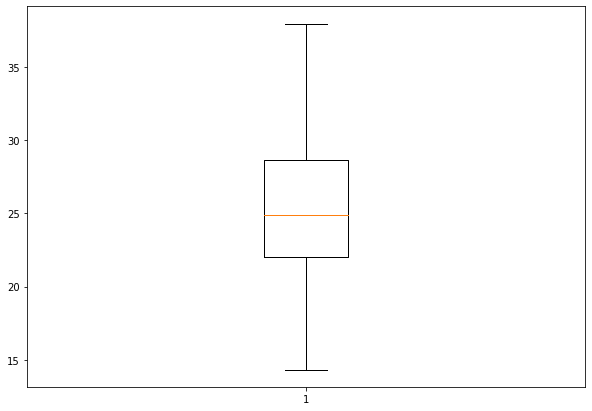

In [173]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Consumo de cerveja (litros)'])
plt.show()

In [174]:
df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


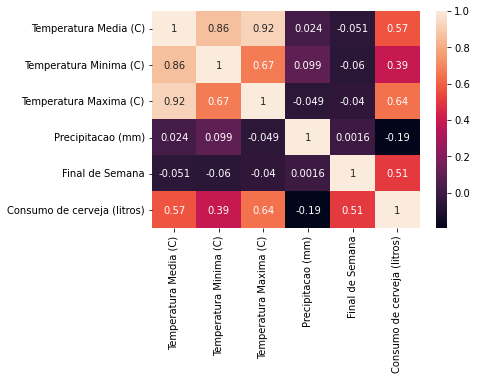

In [175]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [176]:
X=df.drop(columns='Consumo de cerveja (litros)')
y=df['Consumo de cerveja (litros)']

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [178]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [179]:
y_pred=lr.predict(X_test)

In [180]:
lr.intercept_

6.337096986336704

In [181]:
lr.coef_

array([-0.05653246,  0.05010731,  0.68382994, -0.05187215,  5.17298989])

In [182]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred)


0.7343404850876815

In [183]:
mean_absolute_error(y_test,y_pred)

1.9100857756010603

In [184]:
mean_squared_error(y_test,y_pred,squared=False)

2.3019613383193493

#Problem Statement 2: 
You are provided with the California housing dataset. Based on the given 
parameters of a house, predict its price.

In [185]:
!wget https://raw.githubusercontent.com/hemalkachhadiya09/Analysis-Data/main/california_housing_train.csv

--2022-07-05 13:08:37--  https://raw.githubusercontent.com/hemalkachhadiya09/Analysis-Data/main/california_housing_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1706430 (1.6M) [text/plain]
Saving to: ‘california_housing_train.csv.1’

california_housing_ 100%[===================>]   1.63M  --.-KB/s    in 0.04s   

2022-07-05 13:08:37 (45.1 MB/s) - ‘california_housing_train.csv.1’ saved [1706430/1706430]



In [186]:
df=pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [187]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [188]:
df.shape

(17000, 9)

In [189]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [190]:
X=df.drop(columns='median_house_value')
y=df['median_house_value']


In [191]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1000,random_state=2)

In [192]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [193]:
y_pred = lr.predict(X_test)


In [194]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_test,y_pred) # label output, predicted output

0.6747468591705308

In [195]:
mean_absolute_error(y_test,y_pred)

50519.940516359195

In [196]:
lr.intercept_,lr.coef_

(-3621936.49665589,
 array([-4.31447039e+04, -4.28861259e+04,  1.14907538e+03, -8.64144770e+00,
         1.19229975e+02, -3.78821468e+01,  4.30916591e+01,  4.03986827e+04]))

#Problem Statement 3: 
You are provided with the medical cost dataset. You need to 
predict individual medical costs billed by health insurance.


In [197]:
!wget https://raw.githubusercontent.com/hemalkachhadiya09/Analysis-Data/main/insurance.csv

--2022-07-05 13:08:38--  https://raw.githubusercontent.com/hemalkachhadiya09/Analysis-Data/main/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54289 (53K) [text/plain]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  53.02K  --.-KB/s    in 0.008s  

2022-07-05 13:08:38 (6.78 MB/s) - ‘insurance.csv.1’ saved [54289/54289]



In [198]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [199]:
df.shape

(1338, 7)

In [200]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [201]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df)
ohe.transform(df).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [202]:
df[['smoker_no','smoker_yes','sex_female','sex_male']]=pd.get_dummies(df[['smoker','sex']])
df


,age,sex,bmi,children,smoker,region,charges,smoker_no,smoker_yes,sex_female,sex_male
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0


In [203]:
X=df.drop(columns=['charges','region','children','sex','smoker'])
y=df['charges']

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [205]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [206]:
lr.intercept_

627.4320191042934

In [207]:
lr.coef_

array([ 2.53136429e+02,  3.19699263e+02, -1.19582614e+04,  1.19582614e+04,
        4.66031228e+00, -4.66031228e+00])

In [208]:
y_pred = lr.predict(X_test)

In [209]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred) 

0.7458396938166174

In [210]:
mean_squared_error(y_test,y_pred,squared=False)

6178.186497398936

#Problem Statement 4: 
You are provided with the '50_Startups' data. Using the given features, 
you must predict the profit of these startups.


In [211]:
!wget https://raw.githubusercontent.com/hemalkachhadiya09/Analysis-Data/main/50_Startups.csv

--2022-07-05 13:08:38--  https://raw.githubusercontent.com/hemalkachhadiya09/Analysis-Data/main/50_Startups.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2386 (2.3K) [text/plain]
Saving to: ‘50_Startups.csv.1’

50_Startups.csv.1   100%[===================>]   2.33K  --.-KB/s    in 0s      

2022-07-05 13:08:38 (28.9 MB/s) - ‘50_Startups.csv.1’ saved [2386/2386]



In [212]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [213]:
df.shape

(50, 5)

In [214]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [215]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
result=le.fit_transform(df['State'])
df['state']=pd.DataFrame(result)

In [216]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [217]:
X=df.drop(columns='State')
y=df['Profit']

In [218]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [219]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [220]:
lr.intercept_

-1.3096723705530167e-10

In [221]:
lr.coef_

array([ 1.66170995e-15,  6.10622664e-16, -6.66133815e-16,  1.00000000e+00,
        1.73732026e-12])

In [222]:
y_pred = lr.predict(X_test)

In [223]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred) 

1.0

In [224]:
mean_squared_error(y_test,y_pred,squared=False)

8.955636894891483e-11

In [225]:
from sklearn.linear_model import Ridge
rid=Ridge(alpha=0.01)

In [226]:

rid.fit(X_train, y_train) 
pred_train_rr= rid.predict(X_train)
print(mean_squared_error(y_train,pred_train_rr ,squared=False))
print(r2_score(y_train, pred_train_rr))



2.6596634380576518e-08
1.0


In [227]:
pred_test_rr= rid.predict(X_test)
print(mean_squared_error(y_test,pred_test_rr,squared=False)) 
print(r2_score(y_test, pred_test_rr))

1.8034251714601548e-08
1.0


In [228]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)

In [229]:

lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)
print(mean_squared_error(y_train,pred_train_lasso,squared=False))
print(r2_score(y_train, pred_train_lasso))



1.0257832111387561
0.9999999992811688


In [230]:
pred_test_lasso= lasso.predict(X_test)
print(mean_squared_error(y_test,pred_test_lasso,squared=False)) 
print(r2_score(y_test, pred_test_lasso))

0.7571424542232655
0.9999999997094612
